# Crime Data Cleaning (Table 2)

## Initial Data Cleaning

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the dataset for crimes recorded in Victoria
vic_crimes = pd.read_csv("Data/crime_table2.csv", low_memory=False).dropna(how='any')
vic_crimes["Year"] = vic_crimes["Year"].astype(int)
vic_crimes

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2023,December,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,2.0,1.59,1.70
1,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,138.0,109.83,116.99
2,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,146.0,116.20,123.78
3,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",31.0,24.67,26.28
4,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,227.0,180.66,192.45
...,...,...,...,...,...,...,...,...,...,...
50325,2014,December,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F39 Other government regulatory offences,1.0,0.66,0.66
50326,2014,December,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,4.0,2.63,2.63
50327,2014,December,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F93 Cruelty to animals,4.0,2.63,2.63
50328,2014,December,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F94 Dangerous substance offences,1.0,0.66,0.66


In [3]:
# Get relevant columns
clean_crimes = vic_crimes[["Year", "Local Government Area", "Offence Division", "Offence Subdivision", 
                     "Incidents Recorded", "LGA Rate per 100,000 population"]]
clean_crimes

,Year,Local Government Area,Offence Division,Offence Subdivision,Incidents Recorded,"LGA Rate per 100,000 population"
0,2023,Ballarat,A Crimes against the person,A10 Homicide and related offences,2.0,1.70
1,2023,Ballarat,A Crimes against the person,A20 Assault and related offences,138.0,116.99
2,2023,Ballarat,A Crimes against the person,A20 Assault and related offences,146.0,123.78
3,2023,Ballarat,A Crimes against the person,A20 Assault and related offences,31.0,26.28
4,2023,Ballarat,A Crimes against the person,A20 Assault and related offences,227.0,192.45
...,...,...,...,...,...,...
50325,2014,Yarra Ranges,F Other offences,F30 Other government regulatory offences,1.0,0.66
50326,2014,Yarra Ranges,F Other offences,F90 Miscellaneous offences,4.0,2.63
50327,2014,Yarra Ranges,F Other offences,F90 Miscellaneous offences,4.0,2.63
50328,2014,Yarra Ranges,F Other offences,F90 Miscellaneous offences,1.0,0.66


## Crime Incidents in All LGA in 2023

In [6]:
# Filter to only show data in 2023
crime_23 = clean_crimes.loc[clean_crimes["Year"] == 2023]

# Groupby LGA to analysis by incidents by LGA
lga_group = crime_23.groupby("Local Government Area")
lga_incidents = pd.DataFrame(lga_group["LGA Rate per 100,000 population"].sum()).reset_index()
lga_incidents

,Local Government Area,"LGA Rate per 100,000 population"
0,Alpine,2418.08
1,Ararat,8327.36
2,Ballarat,7401.14
3,Banyule,4553.61
4,Bass Coast,5092.90
...,...,...
74,Wodonga,6999.27
75,Wyndham,4404.93
76,Yarra,10406.93
77,Yarra Ranges,3040.97


In [7]:
# Split DF into two
first = lga_incidents.iloc[:40,:]
second = lga_incidents.iloc[40:,:]

In [8]:
# Create function to create bar graphs
def bar_graph(data, title=""):
    lga = data["Local Government Area"]
    rate = data["LGA Rate per 100,000 population"]
    plt.bar(lga, rate)
    plt.xticks(rotation=90, fontsize='xx-small')
    plt.title(title)
    plt.xlabel("Local Government Area")
    plt.ylabel("Rate (per 100,000 population)")
    plt.ylim(0,16000)
    plt.show

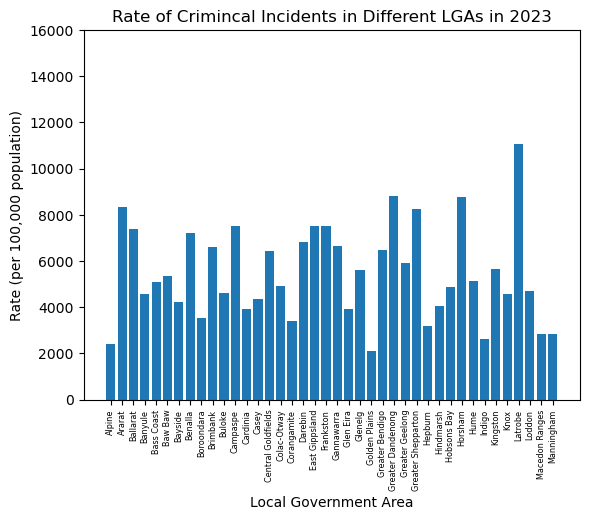

In [9]:
# Graph incidents recorded for the first half
bar_graph(first, title="Rate of Crimincal Incidents in Different LGAs in 2023")
## Graph limit was set to 16,000 to compare with the second graph

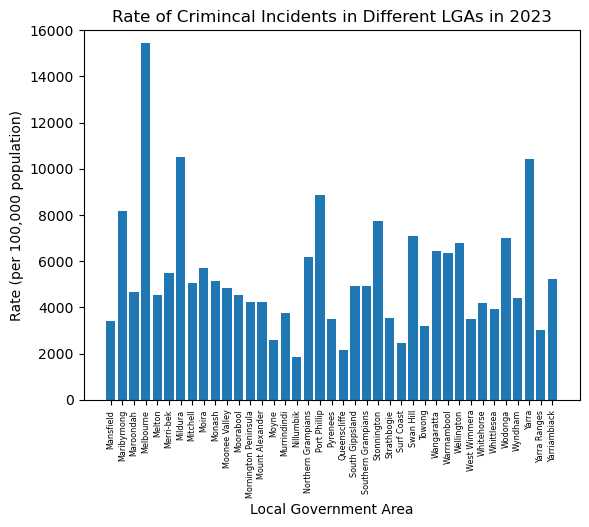

In [10]:
# Graph incidents recorded for the second half
bar_graph(second, title="Rate of Crimincal Incidents in Different LGAs in 2023")

## Top 10 LGAs Over the Years (2014-2023)

In [4]:
# Groupby Years
y_group = clean_crimes.groupby(["Year", "Local Government Area"])["LGA Rate per 100,000 population"]
y_df = pd.DataFrame(y_group.sum()).reset_index()
y_df

,Year,Local Government Area,"LGA Rate per 100,000 population"
0,2014,Alpine,2258.17
1,2014,Ararat,6903.05
2,2014,Ballarat,7539.45
3,2014,Banyule,5440.23
4,2014,Bass Coast,6256.88
...,...,...,...
785,2023,Wodonga,6999.27
786,2023,Wyndham,4404.93
787,2023,Yarra,10406.93
788,2023,Yarra Ranges,3040.97


In [5]:
# Filter DataFrame for each year needed (2014-2023)
y14 = y_df.loc[(y_df['Year'] == 2014), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]
y15 = y_df.loc[(y_df['Year'] == 2015), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]
y16 = y_df.loc[(y_df['Year'] == 2016), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]
y17 = y_df.loc[(y_df['Year'] == 2017), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]
y18 = y_df.loc[(y_df['Year'] == 2018), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]
y19 = y_df.loc[(y_df['Year'] == 2019), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]
y20 = y_df.loc[(y_df['Year'] == 2020), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]
y21 = y_df.loc[(y_df['Year'] == 2021), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]
y22 = y_df.loc[(y_df['Year'] == 2022), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]
y23 = y_df.loc[(y_df['Year'] == 2023), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]

<mark style="background-color: yellow">=====================================CONTINUE LINE CHART=====================================</mark> 

## Top 10 LGA per 100,000 Population in 2024

Text(0.5, 1.0, 'Top 10 LGAs With Highest Criminal Incident Rates in 2023')

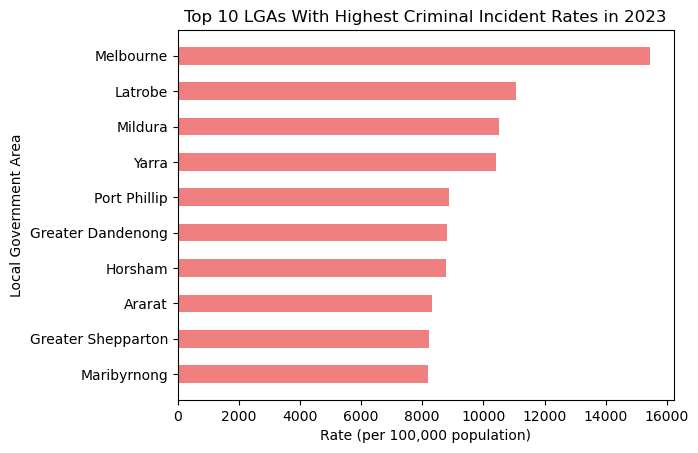

In [11]:
plt.barh(y23["Local Government Area"],y23["LGA Rate per 100,000 population"], height=0.5, color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel("Rate (per 100,000 population)")
plt.ylabel("Local Government Area")
plt.title("Top 10 LGAs With Highest Criminal Incident Rates in 2023")

## Distribution of Crime Types in 2023 (Pie Chart)

In [12]:
# Use crime_23 to make pie chart of crime divisions
# Groupby crime divisions
divisions_group = crime_23.groupby("Offence Division")
division_incidents = pd.DataFrame(divisions_group["Incidents Recorded"].sum())
division_incidents

,Incidents Recorded
Offence Division,
A Crimes against the person,66787.0
B Property and deception offences,229330.0
C Drug offences,13740.0
D Public order and security offences,16395.0
E Justice procedures offences,57791.0
F Other offences,631.0


In [13]:
# Get total number of incidents
total_incidents = division_incidents["Incidents Recorded"].sum()

# Create lists
division = []
incidents = []

# Add to list
for index, row in division_incidents.itertuples():
    division.append(index)
    percentages = round((row / total_incidents * 100),2)
    incidents.append(percentages)

In [14]:
# Rename names in list
division[0] = "Crimes Against the Person"
division[1] = "Property & Deception offences"
division[2] = "Drug Offences"
division[3] = "Public Order & Security Offences"
division[4] = "Justice Procedures Offences"
division[5] = "Other Offences"
division

['Crimes Against the Person',
 'Property & Deception offences',
 'Drug Offences',
 'Public Order & Security Offences',
 'Justice Procedures Offences',
 'Other Offences']

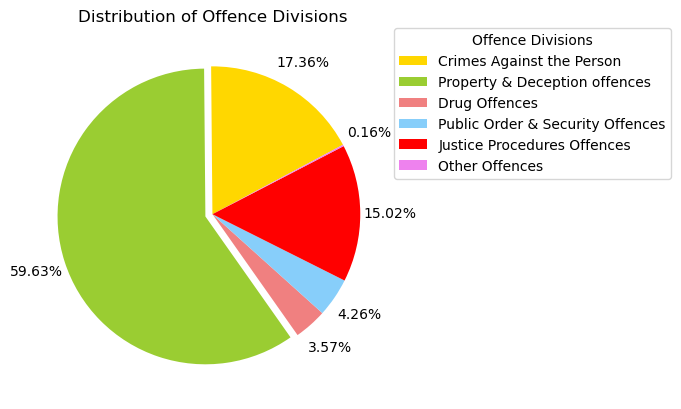

In [15]:
# Create pie chart for crime divisions
colours = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "red", "violet"]
explode = [0,0.05,0,0,0,0]
plt.pie(incidents, autopct='%.02f%%', colors = colours, radius=1,
        startangle=28, explode=explode, pctdistance=1.2)
plt.title("Distribution of Offence Divisions")
plt.legend(division, bbox_to_anchor=(1.76,0.8), loc="center right", title="Offence Divisions")